In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


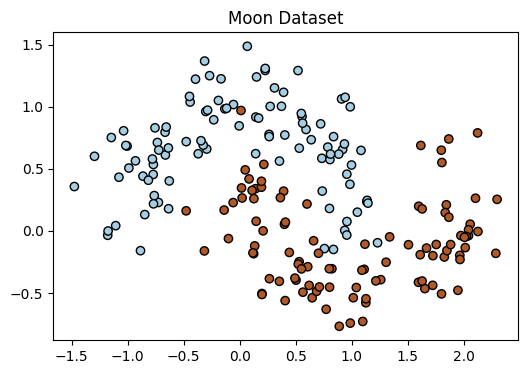

In [9]:
X, y = make_moons(n_samples=200, noise=0.2, random_state=42)

plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.title("Moon Dataset")
plt.show()


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [11]:
svm_poly = SVC(kernel="poly", degree=3, C=1.0, gamma="scale")
svm_poly.fit(X_train, y_train)
print("Polynomial Kernel Accuracy:", svm_poly.score(X_test, y_test))


Polynomial Kernel Accuracy: 0.95


In [12]:
svm_rbf = SVC(kernel="rbf", C=1.0, gamma="scale")
svm_rbf.fit(X_train, y_train)
print("RBF Kernel Accuracy:", svm_rbf.score(X_test, y_test))


RBF Kernel Accuracy: 0.9666666666666667


In [13]:
def plot_decision_boundary(model, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(6, 4))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.Paired)
    plt.title(title)
    plt.show()


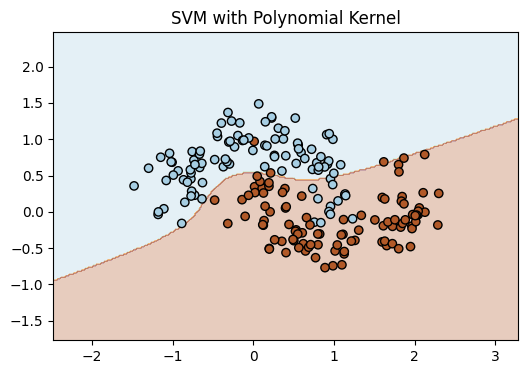

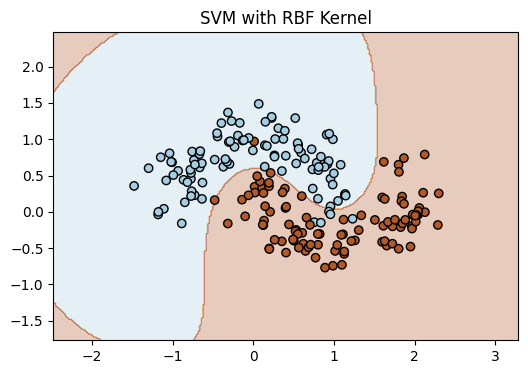

In [14]:
plot_decision_boundary(svm_poly, X, y, "SVM with Polynomial Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")
